<a href="https://colab.research.google.com/github/ngzhankang/finalYearProjectUOB/blob/main/training/NLP_BERT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL YEAR PROJECT - BERT
Done by : 
- P1935785 Ang Yak Hng
- P1932964 Teo Swee Hong Winson
- P1935727 Ng Zhan Kang
- P1935488 Triston Loh
- P1935602 Ng Ao Yang

Class of DIT/FT/3A/05


---
---

# 1.Cloning Github To Colab Workspace

<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> The entire section 1 is dedicated to users who are using google colab to do the entire project. This entire process clones the private repository directly into the temporary google colab workspace. Google colab user are to repeat this same proccess whenever in a new session. Users who do not use colab to do this project CAN OMIT THE ENTIRE SECTION 1. 
</div>

### 1.1. Configurating SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh-keygen -t rsa -b 4096

Generating public/private rsa key pair.
Enter file in which to save the key (/root/.ssh/id_rsa): 
Created directory '/root/.ssh'.
Enter passphrase (empty for no passphrase): 
Enter same passphrase again: 
Your identification has been saved in /root/.ssh/id_rsa.

Your public key has been saved in /root/.ssh/id_rsa.pub.
The key fingerprint is:
SHA256:GiOHgEv6kXoGvarJ6Q2+ycHQbzG2YjuPW3unELB7W0Y root@7925709dfe77
The key's randomart image is:
+---[RSA 4096]----+
|                 |
| .               |
|..o              |
|o+ = .           |
|= * B E S        |
|o+ * O +         |
|.+O B +          |
|+*BB *. .        |
|*O==+..o         |
+----[SHA256]-----+


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> When prompted for a set of informations such as "Enter a file in which to save the key...", please press enter and DO NOT type in anything.
</div>

In [ ]:
!ssh-keyscan -t rsa github.com >> ~/.ssh/known_hosts


# github.com:22 SSH-2.0-babeld-728b22c0


In [ ]:
!cat /root/.ssh/id_rsa.pub

ssh-rsa AAAAB3NzaC1yc2EAAAADAQABAAACAQDSINoW0mx9gHxu0x0m+pfejY/LVXjjSoaleW3ID0YqCcvTmeE1zzqOyokLPvVpxjwBvYKHSaLfzniL0jYiZxYRA3OinTqHqpbztRe1LHulZVtCH4xc9P6caZcakgjroXPgykrhXQOo6bStDmX2CJ0QweZKqHQ0TnQiS2DR77EhXF/YJSXYa4Etk+BfcNAeliMPghuc64bfxiCLvy/WKLohTOUMr02/sfzHICBdxR/YUMMCWscGMLh43HgdfiPFGI7lzjWjdsGXAxNpFtTmBBhVTMuiTqrwYyDwktYvkBbwYOuNcTUCgIi3ZoOcgC/FBR5AAGgKKGDkhSyx7pKCzvEHCrl+ahPPyiEjc7UgnUk3u4R8bkisRIqbu5D8VrmB04M61hHiMdEG0PSnFNl/tho07LmURnnClauMl67F0O/+Vds58wbqomipSAASyxJuWfkt382wRD3upcdBCfXxLJz7DoiUvnM7jgCsKiCPccKyBEFwUypU0xa53Kg0hwm6JlpvtTUvujILOS/yTMFUyCNZK+hwO81lbsC8D92tVSGSNH7QgRwvJJeNXfFHC4IXed/KWsS8Po9jhhUev01GlKDpX72MgmDE5Kto2UGdz/YLUrp8rPeK0Wdv0TWo4P73BVYpVjtCUh9MujplgPSF7oRiqYlzQTpvxLEcrfIHxngxPQ== root@7925709dfe77


<div class="alert alert-block alert-danger">
    <b>ATTENTION:</b> After the key has been generated, please copy the entire key. Navigate to your Github Account > Profile Picture > Settings > SSH and GPG keys > New SSH Keys. Paste the generated key into the blank and lable it for your own convenience.
</div>

### 1.2. Testing SSH keys for GitHub and Colab connection

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!ssh -T git@github.com

Hi ngzhankang! You've successfully authenticated, but GitHub does not provide shell access.


### 1.3. Clone Private Repository

---

This entire section can be omitted if users are not using Google Colab at all.

In [ ]:
!git clone git@github.com:ngzhankang/finalYearProjectUOB.git

Cloning into 'finalYearProjectUOB'...
remote: Enumerating objects: 292, done.
remote: Counting objects: 100% (46/46), done.
remote: Compressing objects: 100% (34/34), done.
remote: Total 292 (delta 19), reused 31 (delta 11), pack-reused 246
Receiving objects: 100% (292/292), 266.14 MiB | 20.79 MiB/s, done.
Resolving deltas: 100% (114/114), done.
Checking out files: 100% (31/31), done.


---
---

# 2.Data Importing

### 2.1. Check if TPU or GPU is utilized.

---

We need to check the if we are currently using TPU or GPU.

In [39]:
import tensorflow as tf

# tpu
if tf.test.gpu_device_name() == '':
  print('Using TPU!')
  resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
  tf.config.experimental_connect_to_cluster(resolver)
  tf.tpu.experimental.initialize_tpu_system(resolver)
  print("All devices: ", tf.config.list_logical_devices('TPU'))
  tpu_usage = True # set tpu_usage bool to true for later usage
  strategy = tf.distribute.TPUStrategy(resolver)
# gpu
else:
  print('Using GPU!')
  print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
  tpu_usage = False # set tpu_usage bool to true for later usage

Using GPU!
Num GPUs Available:  1


In [2]:
! nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


### 2.2. Load the libraries

---

Load the necessary libraries for usage in the entire project.

In [3]:
# suppress future warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# install necessary libraries that might not be found
!pip install -U spacy --quiet
!python -m spacy validate
!pip install -U pip setuptools wheel --quiet
!pip install -U spacy[cuda110,transformers,lookups] --quiet
!python -m spacy download en_core_web_lg --quiet

# check versions of libraries we are going to use
%tensorflow_version 2.x
import os
import tensorflow
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import spacy
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Tensorflow version={}".format(tensorflow.__version__))
print("Keras version={}".format(tensorflow.keras.__version__))
print("Sklearn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("SpaCy version={}".format(spacy.__version__))
print("Python version={}".format(platform.python_version()))

     |████████████████████████████████| 6.4MB 14.3MB/s 
     |████████████████████████████████| 624kB 43.7MB/s 
     |████████████████████████████████| 460kB 50.2MB/s 
     |████████████████████████████████| 51kB 7.9MB/s 
     |████████████████████████████████| 10.1MB 25.1MB/s 
2021-07-11 05:35:38.955593: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
✔ Loaded compatibility table

================= Installed pipeline packages (spaCy v3.1.0) =================
ℹ spaCy installation: /usr/local/lib/python3.7/dist-packages/spacy

No pipeline packages found in your current environment.

     |████████████████████████████████| 1.6MB 15.4MB/s 
     |████████████████████████████████| 819kB 46.2MB/s 
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 169.2 MB 12 kB/s 
     |████████████████████████████████| 97.3 MB 50 kB/s 
     

### 2.3. Load the modules

---

Load the necessary modules for usage in the entire project.

In [5]:
# importing necessary modules for this project
import tensorflow as tf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import string
import spacy

# activate the GPU to run spaCy with GPU
spacy.prefer_gpu()

%matplotlib inline

### 2.4. Load the dataset

---

Load the dataset for usage in the entire project.

In [6]:
# load the train and test datasets
df_train = pd.read_excel('./clean_dataset.xlsx')
df_test = pd.read_excel('./val_dataset.xlsx')

# see the top 5 companies that are populated in the dataframe
df_train.head(5)

,Company_ID,Company,Country,PIC,Sector,Subsector,Archetype,Valuechain,Websites,Company Profile Information,Remarks
0,4137190062363536,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,NaN,TMT,media,media_aggregator/distributor,Midstream,https://getlinks.co/6831,For over 80 years of experience in creating an...,NaN
1,23248790229909752,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://baike.baidu.com/item/%E4%B8%9C%E8%8E%9...,Yatai's main products cover various cleaning m...,NaN
2,28486505934571008,EXIS TECH SDN. BHD.,MALAYSIA,NaN,oos,others,others,NaN,http://www.exis-tech.com/,"In the beginning, it started off by providing ...",NaN
3,38251695094669872,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,39910921263510784,Aztech Electronics Pte Ltd,SINGAPORE,NaN,TMT,consumer electronics,consumer electronics_distributor,Downstream,https://www.aztech.com/business/about-us/,"Being a turnkey, one-stop integrated solutions...",NaN


---
---

# 3.Exploratory Data Analysis

### 3.1. Get overview of dataset

---

Get statistical information of the dataset to understand the dataset better.

In [7]:
# see the row headers of the entire pandas dataframe first
list(df_train.columns)

['Company_ID',
 'Company',
 'Country',
 'PIC',
 'Sector',
 'Subsector',
 'Archetype',
 'Valuechain',
 'Websites',
 'Company Profile Information',
 'Remarks']

In [8]:
# get the total number of records in the dataframe
df_count = df_train['Company_ID'].count()

# get count of unique contries where companies are based in
df_countCountry = df_train['Country'].nunique()

# get count of total unique sectors where companies are from
df_countSector = df_train['Sector'].nunique()

# get count of total unique subseector where companies are from
df_countsubSector = df_train['Subsector'].nunique()

# get count of total unique valuechain where companies are from
df_countValuechain = df_train['Valuechain'].nunique()

# get count of total unique archetypes
df_countArchetype = df_train['Archetype'].nunique()

print('Total number of records:', df_count)
print('Total number of countries:', df_countCountry)
print('Total number of sectors:', df_countSector)
print('Total number of subsectors:', df_countsubSector)
print('Total number of valuechain:', df_countValuechain)
print('Total number of archetypes:', df_countArchetype)

Total number of records: 6600
Total number of countries: 13
Total number of sectors: 15
Total number of subsectors: 36
Total number of valuechain: 18
Total number of archetypes: 93


In [9]:
# get total number of countries
df_totalCountries = df_train['Country'].value_counts()

# get list of unique sector
df_sector = df_train['Sector'].value_counts()

# get list of unique archetype
df_archetype = df_train['Archetype'].value_counts()

# get list of unique valuechain
df_valuechain = df_train['Valuechain'].value_counts()

print('List of unique countries:\n{}'.format(df_totalCountries))
print()
print('List of unique sector:\n{}'.format(df_sector))
print()
print('List of unique valuechain:\n{}'.format(df_valuechain))

List of unique countries:
SINGAPORE         2213
MALAYSIA          1586
THAILAND          1321
CHINA              729
HONG KONG          380
INDONESIA          357
VIETNAM              5
MYANMAR              2
AUSTRALIA            2
TAIWAN               2
UNITED KINGDOM       1
LABUAN               1
CANADA               1
Name: Country, dtype: int64

List of unique sector:
OOS    1353
CNI    1261
REH     566
CG      565
IND     550
ONG     428
TMT     419
cni     258
tmt     188
oos      79
ong      66
ind      11
cg        7
reh       6
          1
Name: Sector, dtype: int64

List of unique valuechain:
MIDSTREAM                 1188
Downstream                 791
Midstream                  455
DOWNSTREAM                 437
                           432
midstream                  309
Manufacturer               175
downstream                 172
UPSTREAM                   159
Upstream or Downstream     119
Trader                     113
Upstream                    99
distributor     

In [10]:
# get list of unique subsector
df_subsector = df_train['Subsector'].value_counts()

print('List of unique Subsector:\n{}'.format(df_subsector))

List of unique Subsector:
others                               1432
building_material                     645
buildings & industrial                415
retail n distribution                 376
auto & mec                            296
petrochemical                         282
consumer electronics                  238
metals and mining                     203
cni_service providers                 200
residential                           190
restaurants, catering & services      163
utilities                             138
fmcg                                  123
it_services                           120
o&g_service providers/contractors      93
semiconductor                          90
o&g                                    89
mixed                                  87
infrastructure                         75
telecommunication                      69
media                                  63
commercial                             63
diversified                            61
hotels a

In [11]:
print('List of unique archetype:\n{}'.format(df_archetype))

List of unique archetype:
others                                    1432
building_material_manufacturer             434
buildings & industrial_contractor          381
consumer discretionary distributor         236
building_material_supplier_distributor     211
                                          ... 
gas and lng                                  1
metals and mining                            1
o&g_refiner                                  1
industrial gas                               1
building material_manufacturer               1
Name: Archetype, Length: 93, dtype: int64


### 3.2. Drop unncessary columns

---

Here, we will drop columns that wiill not aid in our EDA.

In [12]:
# declare the list of the row names that are redundant
rows_to_drop = ['Company_ID', 'PIC', 'Websites', 'Remarks']

# use a conditional expression to filter out those rows
df_filteredCompanies = df_train.drop(labels=rows_to_drop, axis=1)

df_filteredCompanies

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,PAN ENERGY is an ACRA-registered entity that h...
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become o..."
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,Siak Siong Group is an established group speci...
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations"


### 3.3. Filter rows with valid data

---

Extract columns with Nan values and list them out here. Afterwards, gather the rows deemed suitable to process NLP.

In [13]:
# find all the rows with nan data in sector, subsector, archetype and valuechain
cols_to_check = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']
empty = df_filteredCompanies[df_filteredCompanies[cols_to_check].isnull().all(1)]

empty

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
3,BEI JING ESTRABA IMPORT AND EXPORT,CHINA,NaN,NaN,NaN,NaN,NaN
12,"CHANGTU COUNTRY LONGXING FERTILIZER CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
28,"ZIBOBOSHANHONGLIWEI MOTOR CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
48,"BEIJING DUO MEIDUO SHIYOU PRODUCTS SALES CO., ...",CHINA,NaN,NaN,NaN,NaN,NaN
63,TRUSVEST SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
6554,HUAYE STEEL STRUCTURE NUCLEAR POWER EQUIPMENT ...,CHINA,NaN,NaN,NaN,NaN,NaN
6558,"XINYANG SITONG MACHINERY MANUFACTURE CO.,LTD",CHINA,NaN,NaN,NaN,NaN,NaN
6574,SENLIN HOLDINGS LIMITED,HONG KONG,NaN,NaN,NaN,NaN,NaN
6585,SETIA AWAN PROPERTIES SDN. BHD.,MALAYSIA,NaN,NaN,NaN,NaN,NaN


In [14]:
# now we get the dataset that are valid
df_valid = pd.concat([df_filteredCompanies, empty, empty]).drop_duplicates(keep=False)

df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,For over 80 years of experience in creating an...
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,Yatai's main products cover various cleaning m...
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing ..."
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions..."
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,Tongdun Technology is a professional third-par...
...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,PAN ENERGY is an ACRA-registered entity that h...
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,NaN,"Established in 2000, TI has grown to become o..."
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,Siak Siong Group is an established group speci...
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations"


In [15]:
# now we check the count of the total filtered dataset again
df_filterCount = df_valid['Company'].count()

print('Total number of filtered records:', df_filterCount)

Total number of filtered records: 5766


### 3.4. Get graphical overview of dataset

---

Get visualised information of the dataset to understand the dataset better.

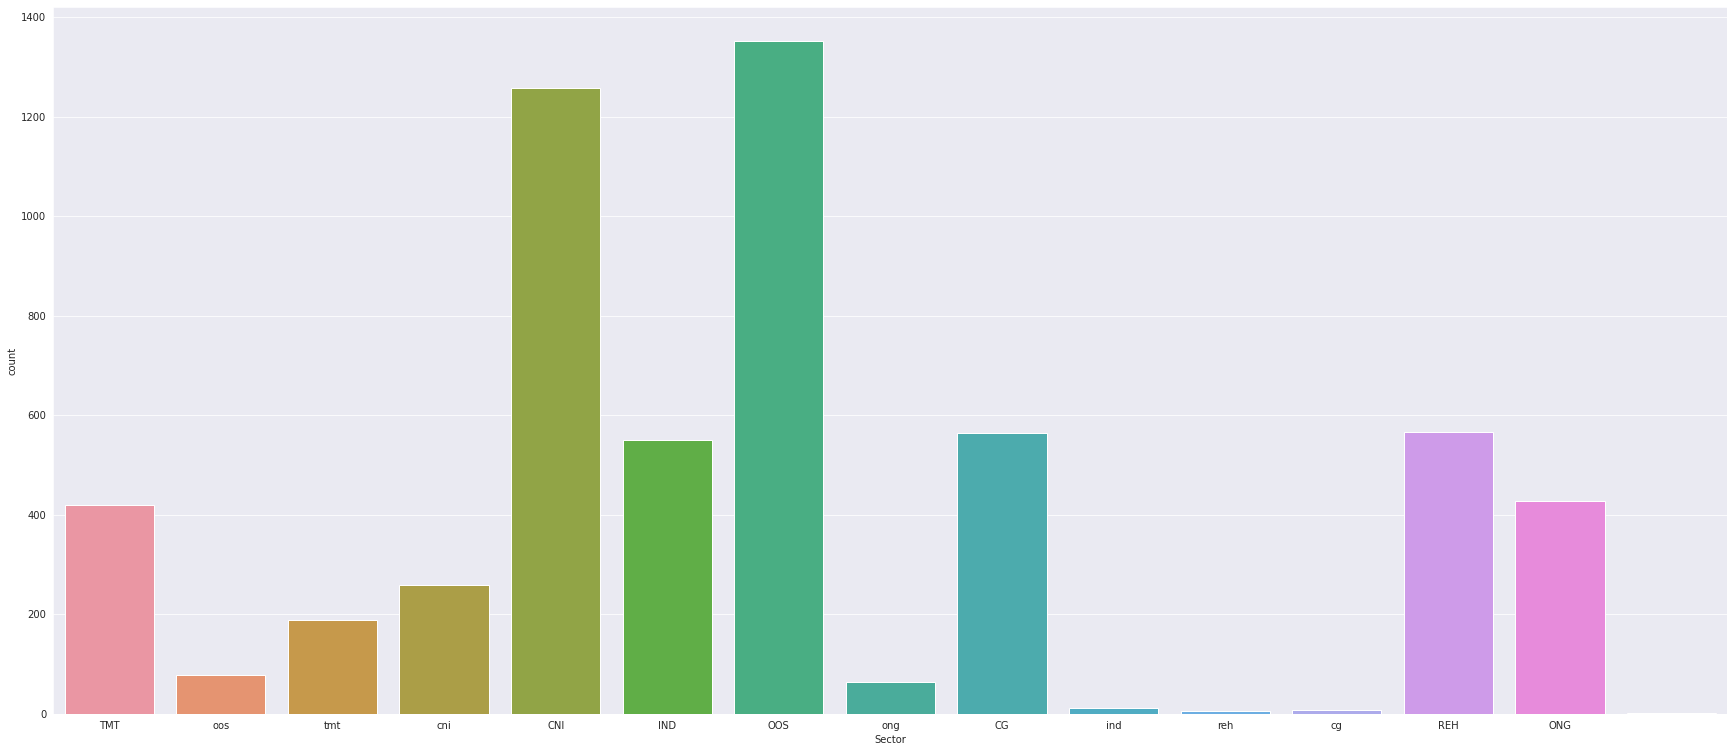

In [16]:
sns.set_style('darkgrid')
plt_dims = (30, 13)
fig, ax = plt.subplots(figsize=plt_dims)

# plot a barplot to see number of companies that belongs to specific sectors
sns.countplot(x="Sector", data=df_valid, ax=ax)
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies comes from the CNI(Construction And Infrastructure), with TMT(Technology, Media and Telecomm) sector.
</div>

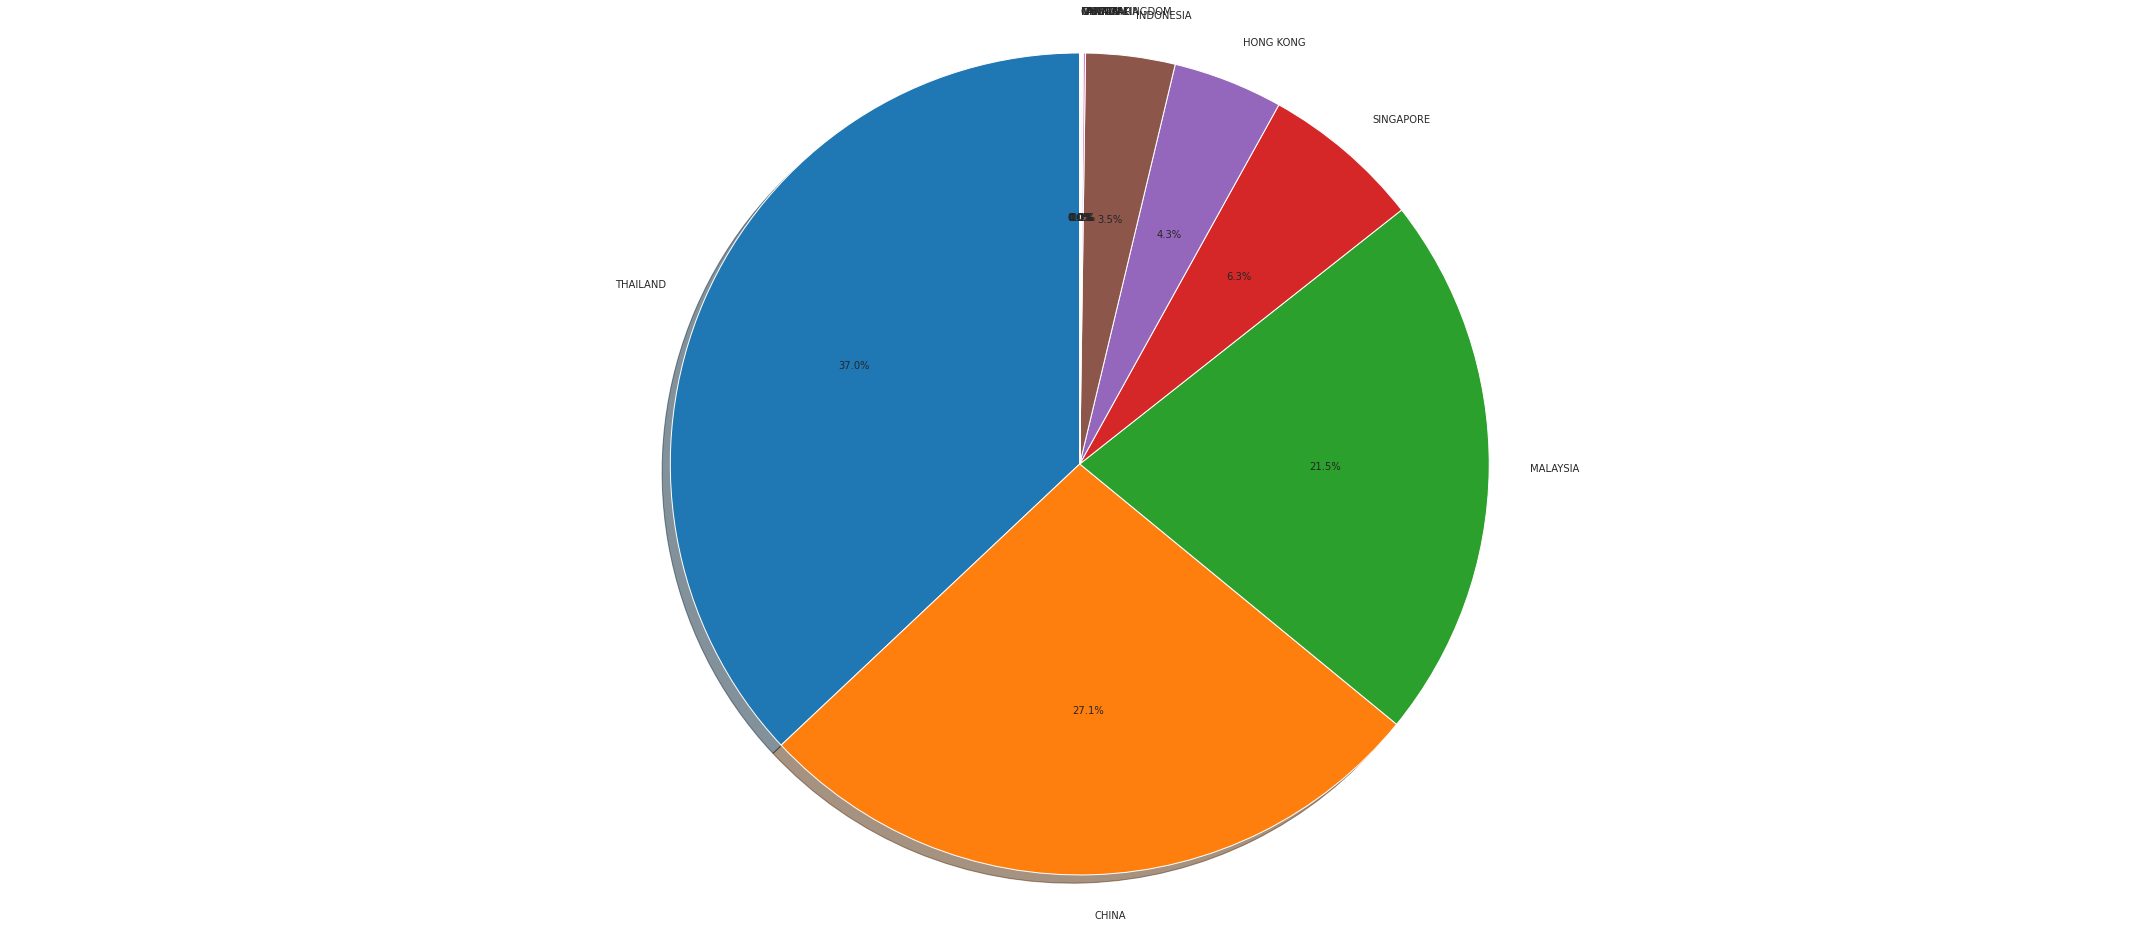

In [17]:
# Pie chart
labels = list(df_valid['Country'].unique())
sizes = list(df_valid['Country'].value_counts())

plt_dims = (30, 13)
fig1, ax1 = plt.subplots(figsize=plt_dims)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We see that most of the companies are Singapre-Based companies, followed up by Hong Kong, Indonesia and so on.
</div>

### 3.5. See examples of company description

---

We would now like to see some examples of the company descriptions in order to undestand later how to preprocess them later on.

In [18]:
# configurate pandas dataframe to let us see the entire company description IN FULL
pd.set_option('display.max_colwidth', None)

# get the 1st 10 results and observe
df_valid.loc[0:10,'Company Profile Information']

0                                                                                                                                                                                                                                                                                                                                                                        For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.
1                                                                                                                                                                                                                                                                                                                                    Yatai's main products cover various cleaning machinery, cleaning agents, cl

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We do realise that some of the company profile message have some breaks in between like '\n'. Now, we will have to take away all these problems so that it is one string of paragraph with no such annotations in betweeen.
</div>

---
---

# 4.Data Preprocessing

### 4.1. Removing `\n` and `\t`

---

Now, we will like to standardize all the paragraphs such that the are homogenous, before we tokenize the paragraph.

In [19]:
# get rid of the \n found in the respective descriptions
df_valid = df_valid.replace(["\n", "\t"], ' ', regex=True)

### 4.2. Calculating the word length distribution

---

Here, we will be calculating the world length distribution of the collective company description.

In [20]:
# first, add in a new column that tabluates the length of the respecive company description
df_valid["length"] = df_valid["Company Profile Information"].str.len()
df_valid.head(3)

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238.0
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273.0
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,NaN,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344.0


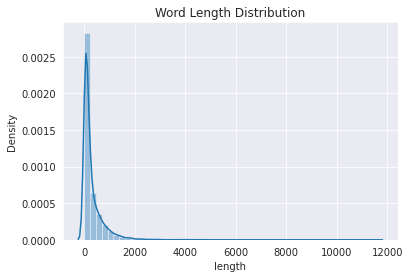

In [21]:
# now plot a distribution plot to see the word length distribution
sns.distplot(df_valid["length"], kde=True)
plt.title('Word Length Distribution')
plt.show()

<div class="alert alert-block alert-info">
    <b>Analysis Summary:</b> We can see that there is a high record of the company description having a total word length of around 200 to 300, while those aboce 800 is very rare.
</div>

### 4.3. Populating Nan cells

---

We will now have to populate Nan cells with space so that we can carry on and process with text tokenization.

In [22]:
# fill na with space instead of others
df_valid.fillna(" " ,inplace=True)
df_valid

,Company,Country,Sector,Subsector,Archetype,Valuechain,Company Profile Information,length
0,"AKSORN CHAROEN TAT ACT. CO.,LTD.",THAILAND,TMT,media,media_aggregator/distributor,Midstream,"For over 80 years of experience in creating and developing high-quality learning materials has enabled us to provide world-class educational innovation to meet the needs of all teachers, students, institutions and educational authorities.",238
1,DONGGUAN SHENGYA CLEANING APPLIAME CO.LTD,CHINA,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Yatai's main products cover various cleaning machinery, cleaning agents, cleaning tools, stone maintenance and other cleaning products; cleaning solutions and services include product technical consultation, product customization, employee training, maintenance and so on.",273
2,EXIS TECH SDN. BHD.,MALAYSIA,oos,others,others,,"In the beginning, it started off by providing technical support for test handlers, then moving into module design and production. Its first, in-house designed, full-fledged handler was introduced in 2008. Since then, the company has designed and produced a wide range of turret and pick-and-place solutions for its customers all over the world.",344
4,Aztech Electronics Pte Ltd,SINGAPORE,TMT,consumer electronics,consumer electronics_distributor,Downstream,"Being a turnkey, one-stop integrated solutions provider based in Singapore, Aztech is equipped with state-of-the-art equipment, R&D, design, manufacturing and packaging capabilities to deliver a seamless, unified experience. Each and every time. Always striving towards the edge of technology for more than 34 years, we have been building capabilities to serve clients’ manufacturing needs, including the consumer electronics, telecommunications, healthtech, LED lighting, automotive and technology start-up market segments.",524
5,TONGDUN INTERNATIONAL PTE LTD,SINGAPORE,tmt,it_services,it_services,midstream,"Tongdun Technology is a professional third-party intelligent risk management and decision-making service provider headquartered in Hangzhou, Zhejiang. By integrating artificial intelligence into business scenarios, Tongdun Technology offers solutions in intelligent user analysis, intelligent risk management, intelligent antifraud and intelligent operation to clients from various industries including financial industry, internet business, logistics, healthcare, retail, smart cities and government bodies. Over 10,000 corporate clients have chosen Tongdun Technology’s products and services",593
...,...,...,...,...,...,...,...,...
6595,PAN ENERGY PTE. LTD.,SINGAPORE,ONG,ong_traders,bunker trader,Downstream,"PAN ENERGY is an ACRA-registered entity that has been operating for 5 years 7 months in Singapore since its incorporation y in 2015. Officially, PAN ENERGY PTE. LTD. is registered as Exempt Private Limited Company with its address in District 9 (Orchard, Cairnhill, River Valley), primarily operates in the sector of ""SHIPPING LINES (SCHEDULED SERVICES)"", SSIC code - 50021 SHIP BUNKERING",388
6596,"TRIM INTERNATIONAL CO.,LTD.",THAILAND,OOS,others,others,,"Established in 2000, TI has grown to become one of Southeast Asia's leaders in leather cut and sewn furniture covers.",118
6597,SIAK SIONG CONSTRUCTION SDN BHD,MALAYSIA,REH,commercial,commercial_integrated player,MIDSTREAM,"Siak Siong Group is an established group specialised in construction industry with diversity in engineering industry, real estate development, building materials industry, plantation and Real Estate Investment and Management industry.",234
6598,"KIJ THAWEE PATTANA CO.,LTD.",THAILAND,REH,commercial,commercial_operator,DOWNSTREAM,"Rental, purchase, sale and real estate operations",49


### 4.5. Assigning tags
---
In this section, we will be assigning tags to every row, so that we can make use of the given keywords for bag-of-words (BoW) processing.

In [23]:
# Programmatically assign tags to each definition
sector_keywords = pd.read_excel('./sector_master_definition.xlsx')
df_keywords = sector_keywords[['Sector', 'Subsector', 'Archetype', 'Value Chain', 'Sector Keywords']]

# capitalise all tags
df_keywords['Value Chain'] = df_keywords['Value Chain'].str.upper()
df_keywords.fillna(' ', inplace=True)
df_keywords['Sector Keywords'] = df_keywords['Sector Keywords'].str.upper()
df_keywords['Sector Keywords'].replace(' ', '[]', inplace=True)

# save unique tags, sorted for consistency across runs
sector = np.sort(df_keywords['Sector'].unique())
subsector = np.sort(df_keywords['Subsector'].unique())
archetype = np.sort(df_keywords['Archetype'].unique())
valuechain = np.sort(df_keywords['Value Chain'].unique())
print(len(sector), len(subsector), len(archetype), len(valuechain))
tag_counts = [len(sector), len(subsector), len(archetype), len(valuechain)]

# assign number tag list to each row
taglist = []
for index, row in df_keywords.iterrows():
    temp = []

    temp.append(np.where(sector == row['Sector'])[0][0])
    temp.append(np.where(subsector == row['Subsector'])[0][0])
    temp.append(np.where(archetype == row['Archetype'])[0][0])
    temp.append(np.where(valuechain == row['Value Chain'])[0][0])

    taglist.append(temp)

# assign completed taglist to column in dataframe
df_keywords['list_tag'] = taglist

7 32 92 9


In [24]:
# process data for homogenity
df_valid['Valuechain'] = df_valid['Valuechain'].str.split().str.join(' ')
df_valid['Valuechain'] = df_valid['Valuechain'].str.upper()
df_valid['Sector'] = df_valid['Sector'].str.upper()
df_valid['Valuechain'].replace('', ' ', inplace=True)

taglist_df = []
# process tags for records
for index, row in df_valid.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except:
        # drop data if not valid
        df_valid.drop(index, inplace=True)


df_valid['list_tag'] = taglist_df

df_valid.shape

(5745, 9)

In [25]:
# combine all keywords from all sectors
keywords_masterlist = []
for index, row in df_keywords.iterrows():
    keywords_masterlist += eval(row['Sector Keywords'])

# remove extraenous keywords, then sort
keywords_masterlist = sorted(list(set(keywords_masterlist)))
print(len(keywords_masterlist))

1481


### 4.6. Text Tokenization, data preprocessing using BertTokenizerFast
---

We will let huggingface go and help to preprocess our sentences and tokenize them so that we can feed into BERT later on.

In [26]:
# we will have to ensure all the dtype of the respective columns are in string and not float for spacy to handle properly, so now we will attempt to convert all into strings
columns_to_convert = ['Sector', 'Subsector', 'Archetype', 'Valuechain', 'Company Profile Information']

for i in columns_to_convert:
  df_valid[i] = df_valid[i].astype(str)

In [27]:
# instead of using spacy tokenizer, we will make use of the preprocessing and tokenizer in the python package from huggingface
from transformers import TFBertModel, BertConfig, BertTokenizerFast

# use the uncased bert model
config = BertConfig.from_pretrained('bert-base-uncased')

# set the output_hidden_state to false since we have 4 different classes with their respective labels AND we want to define our own hidden layers
config.output_hidden_states = False

# load the BERT tokenizer first. BertTokenizerFast tokenize faster than BertTokenizer as it uses Rust
tokenizer = BertTokenizerFast.from_pretrained(pretrained_model_name_or_path='bert-base-uncased', config=config)

### 4.7. Preprocessing data for validation testset.

---

We will perform data preprocessing for the validation testset.

In [28]:
df_test.replace('NAN', np.NaN, inplace=True)

# drop unnecessary columns
df_test.drop(rows_to_drop, axis=1, inplace=True)

# replace newline characters in validation data
df_test = df_test = df_test.replace('\n', ' ', regex=True)

# fill in NAN values in validation data
df_test.fillna(' ', inplace=True)

# change dtype of validation data columns
for i in columns_to_convert:
    df_valid[i] = df_valid[i].astype(str)

# add tags to validation data
taglist_df = []
# process tags for records
for index, row in df_test.iterrows():
    temp = []

    try: # for error handling
        temp.append(np.where(sector == row['Sector'])[0][0])
        temp.append(np.where(subsector == row['Subsector'])[0][0])
        temp.append(np.where(archetype == row['Archetype'])[0][0])
        temp.append(np.where(valuechain == row['Valuechain'])[0][0])

        taglist_df.append(temp)
    except Exception as e:
        # drop data if not valid
        print(row.name, e, '\n')
        df_test.drop(index, inplace=True)

df_test['list_tag'] = taglist_df

### 4.8. Preparing data for BERT

---

Now we will start to partition the data for BERT.

In [29]:
# randomise dataset first here
df_train_rand = df_valid.sample(frac=1).reset_index(drop=True)
df_test_rand = df_test.sample(frac=1).reset_index(drop=True)

In [30]:
# drop the length column section from the train_rand df since its not necessary
df_train_rand.drop(['length'], axis=1, inplace=True)

# define one hot encode function
def one_hot(arr, n_cat):
    output = []
    for n in arr:
        result = np.zeros(n_cat)
        result[n] = 1

        output.append(result)

    return np.array(output, dtype=int)

In [31]:
# split into data and labels
X_train = tokenizer(text=df_train_rand['Company Profile Information'].to_list(),
                    add_special_tokens=True, # add special tokens like [SEP] and others
                    max_length=100,  # this is the max length of the sentence-to-be-token
                    truncation=True,
                    padding=True,
                    return_tensors='tf', # to return it as tf tensors to feed into keras API
                    return_token_type_ids=False,
                    return_attention_mask=True, # generate attention mask
                    verbose=True)

X_test = tokenizer(text=df_test_rand['Company Profile Information'].to_list(),
                   add_special_tokens=True,
                   max_length=100,  # we use the max length that BERT can handle
                   truncation=True,
                   padding=True,
                   return_tensors='tf',
                   return_token_type_ids=False,
                   return_attention_mask=True,
                   verbose=True)

y_train = np.array(list(df_train_rand['list_tag']))
y_test = np.array(list(df_test_rand['list_tag']))

In [32]:
# have a view of the input_ids
X_train['input_ids']

<tf.Tensor: shape=(5745, 100), dtype=int32, numpy=
array([[ 101, 7149, 1999, ...,    0,    0,    0],
       [ 101, 2108, 1037, ...,    0,    0,    0],
       [ 101, 6228, 1010, ...,    0,    0,    0],
       ...,
       [ 101, 1996, 2194, ...,    0,    0,    0],
       [ 101, 2057, 2024, ...,    0,    0,    0],
       [ 101, 3103, 3597, ..., 5281, 3716,  102]], dtype=int32)>

In [33]:
# have a view of the attention_mask.
# The “attention mask” tells the model which tokens should be attended to and which (the [PAD] tokens) should not (see the documentation for more detail). It will be needed when we feed the input into the BERT model.
X_train['attention_mask']

<tf.Tensor: shape=(5745, 100), dtype=int32, numpy=
array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>

In [34]:
label_names = ['sector', 'subsector', 'archetype', 'valuechain']

y_train_multi = {label_names[i] : tf.convert_to_tensor(one_hot(y_train[:, i], tag_counts[i]), dtype=tf.int16) for i in range(4)}
y_test_multi = {label_names[i] : tf.convert_to_tensor(one_hot(y_test[:, i], tag_counts[i]), dtype=tf.int16) for i in range(4)}

---
---

# 5.BERT model
---
Here we will train the model that will help categorize each company.

### 5.1. Training Models

---

Now we will put in the BERT model using Keras Functional API and train it.

In [35]:
import keras

print('--- Version Checking ---')
print("Keras:", keras.__version__)

--- Version Checking ---
Keras: 2.5.0


In [36]:
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, GlobalAveragePooling1D, Input, Lambda, Embedding
from tensorflow.keras.layers import ReLU, BatchNormalization, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.initializers import TruncatedNormal

# create mulit output model
def multi_branch(inputs, name, output_dim, counter, transformer_model):

  # Load the Transformers BERT model as a layer in a Keras model
  bert = transformer_model.layers[0]
  bert_model = bert(inputs)[1]
  dropout = Dropout(config.hidden_dropout_prob, name="pooled_output_{}".format(counter+1))
  pooled_output = dropout(bert_model, training=False)

  # build the model output
  output = Dense(output_dim, kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name=name, activation='softmax')(pooled_output)
  
  return output

In [37]:
# create the multi output branches
def create_model(labels, output_dim):
  # input
  input_ids = Input(shape=(100,), name='input_ids', dtype='int32')
  attention_mask = Input(shape=(100,), name='attention_mask', dtype='int32') 
  inputs = {'input_ids': input_ids, 'attention_mask': attention_mask}

  # preload the BERT transformer model
  transformer_model = TFBertModel.from_pretrained('bert-base-uncased', config=config)

  # create the respective branches for the outputs
  branches = []

  for i in range(len(labels)):
    branches.append(multi_branch(inputs, labels[i], output_dim[i], i, transformer_model))

  # fit the entire model into keras Model class
  model = Model(inputs=inputs, outputs=branches, name='company_classification_model')

  return model

In [42]:
from tensorflow.keras.metrics import Precision, Recall, AUC
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

# for tpu
if tpu_usage:
  with strategy.scope():
    model = create_model(label_names, tag_counts)
    opt = Adam(learning_rate=5e-05, epsilon=1e-08, decay=0.01, clipnorm=1.0)
    losses = {i : 'categorical_crossentropy' for i in label_names}
    model.compile(loss=losses, optimizer=opt, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000)])

# for gpu
else:
  # create the model
  model = create_model(label_names, tag_counts)
  opt = Adam(learning_rate=5e-05, epsilon=1e-08, decay=0.01, clipnorm=1.0)
  losses = {i : 'categorical_crossentropy' for i in label_names}
  model.compile(loss=losses, optimizer=opt, metrics=['accuracy', Precision(), Recall(), AUC(name='auc_precision_recall', num_thresholds=10000)])

# print model summary
model.summary()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Model: "company_classification_model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
attention_mask (InputLayer)     [(None, 100)]        0                                            
__________________________________________________________________________________________________
input_ids (InputLayer)          [(None, 100)]        0                                            
__________________________________________________________________________________________________
bert (TFBertMainLayer)          TFBaseModelOutputWit 109482240   attention_mask[0][0]             
                                                                 input_ids[0][0]                  
                                                                 attention_mask[0][0]             
                                                                 input_

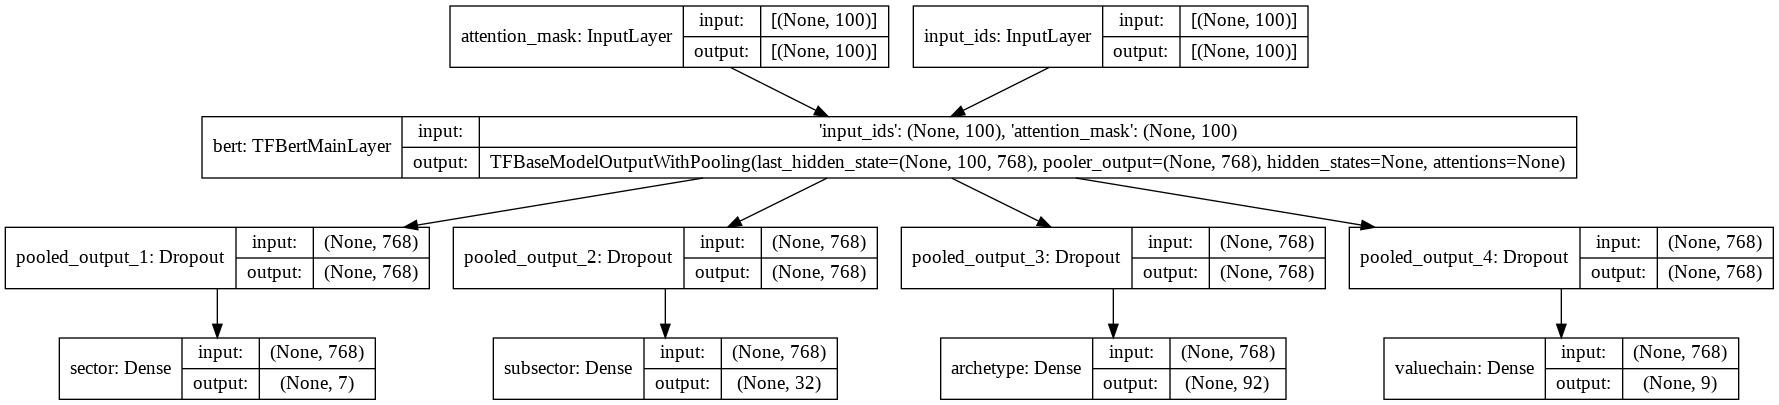

In [43]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [44]:
from tensorflow.keras.metrics import Precision, Recall, AUC, CategoricalAccuracy
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

# setting optimizer - based on recommended vals
opt = Adam(learning_rate=5e-05, epsilon=1e-08, decay=0.01, clipnorm=1.0)

# defining loss
losses = {i : 'categorical_crossentropy' for i in label_names}

# train model
history = model.fit({'input_ids': X_train['input_ids'], 'attention_mask': X_train['attention_mask']}, y_train_multi, validation_split=0.2, epochs=15, batch_size=16)

Epoch 1/15
288/288 [==============================] - 212s 516ms/step - loss: 8.1174 - sector_loss: 1.2230 - subsector_loss: 2.3670 - archetype_loss: 3.1914 - valuechain_loss: 1.3359 - sector_accuracy: 0.5968 - sector_precision: 0.8575 - sector_recall: 0.3050 - sector_auc_precision_recall: 0.8914 - subsector_accuracy: 0.4038 - subsector_precision: 0.8638 - subsector_recall: 0.0883 - subsector_auc_precision_recall: 0.8852 - archetype_accuracy: 0.3444 - archetype_precision: 0.8445 - archetype_recall: 0.0603 - archetype_auc_precision_recall: 0.8794 - valuechain_accuracy: 0.5224 - valuechain_precision: 0.7914 - valuechain_recall: 0.2213 - valuechain_auc_precision_recall: 0.8966 - val_loss: 6.5616 - val_sector_loss: 0.8762 - val_subsector_loss: 1.8634 - val_archetype_loss: 2.6832 - val_valuechain_loss: 1.1387 - val_sector_accuracy: 0.7215 - val_sector_precision: 0.8148 - val_sector_recall: 0.5744 - val_sector_auc_precision_recall: 0.9413 - val_subsector_accuracy: 0.5161 - val_subsector_prec

### 5.2 Evaluating Models

---

After we train finish, we shall now see the accuracy and loss graph to determine model overfitting and how the model turns out to be like.

In [45]:
metrics = model.evaluate({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']}, y_test_multi)[1:]

print(f'Label\t\tLoss\tAccuracy\tPrecision\tRecall\tPR AUC\tF1 Score')
for i, label in enumerate(label_names):
    print(f'{label:<16}{metrics[i]:<8.3f}{metrics[i+4]:<8.3%}\t{metrics[i+8]:<9.3f}\t{metrics[i+12]:<6.3f}\t{metrics[i+16]:<6.3f}\t{(metrics[i+8] * metrics[i+12]) / (metrics[i+8] + metrics[i+12]):<8.3f}')

44/44 [==============================] - 13s 288ms/step - loss: 4.1582 - sector_loss: 0.4029 - subsector_loss: 1.0409 - archetype_loss: 1.9470 - valuechain_loss: 0.7675 - sector_accuracy: 0.8907 - sector_precision: 0.8982 - sector_recall: 0.8821 - sector_auc_precision_recall: 0.9776 - subsector_accuracy: 0.7214 - subsector_precision: 0.8310 - subsector_recall: 0.5829 - subsector_auc_precision_recall: 0.9713 - archetype_accuracy: 0.5114 - archetype_precision: 0.8097 - archetype_recall: 0.3221 - archetype_auc_precision_recall: 0.9631 - valuechain_accuracy: 0.7679 - valuechain_precision: 0.8411 - valuechain_recall: 0.6693 - valuechain_auc_precision_recall: 0.9578
Label		Loss	Accuracy	Precision	Recall	PR AUC	F1 Score
sector          0.403   89.071% 	0.721    	0.511 	0.768 	0.299   
subsector       1.041   89.818% 	0.831    	0.810 	0.841 	0.410   
archetype       1.947   88.214% 	0.583    	0.322 	0.669 	0.207   
valuechain      0.767   97.760% 	0.971    	0.963 	0.958 	0.484   


Label					Accuracy	Correct Rows	% Correct Rows	Precision	Recall
--------------------------------------------------------------------------------------------------------------
CG                                      77.0%           130             65.0%           0.880           0.770 
> agribusiness                          77.78%          6               3.0%            1.000           0.778 
> animal protein                        26.32%          5               2.5%            1.000           0.263 
> fmcg                                  73.68%          28              14.0%           0.667           0.737 
> retail n distribution                 68.66%          91              45.5%           0.773           0.687 
--------------------------------------------------------------------------------------------------------------
CNI                                     96.0%           149             74.5%           0.853           0.960 
> building_material                     93.48%  

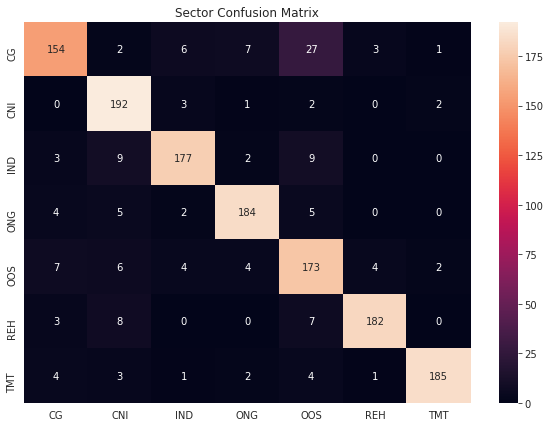

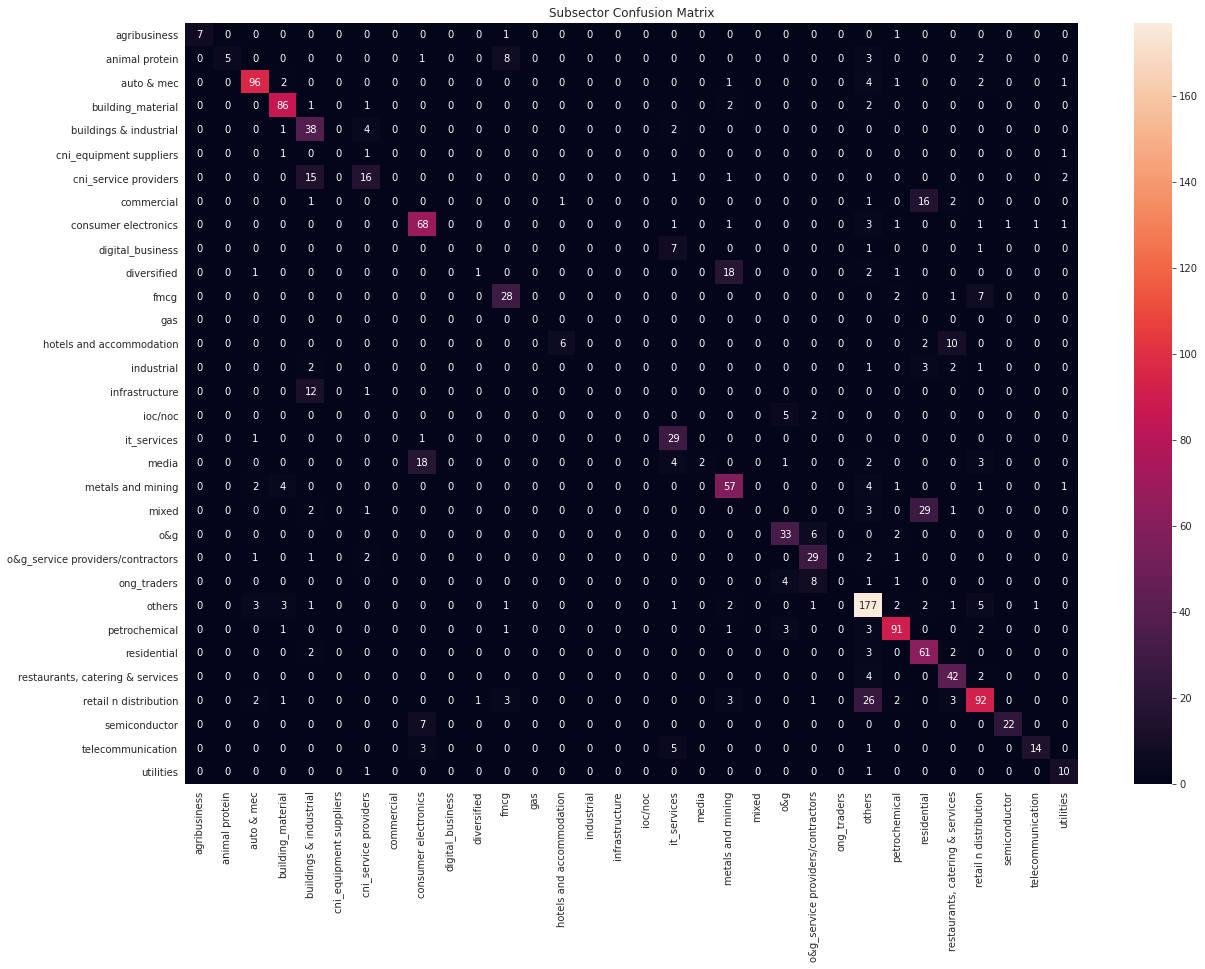

In [46]:
# custom metric analysis
y_test_multi = [one_hot(np.array(list(df_test_rand['list_tag']))[:, i], tag_counts[i]) for i in range(4)]
y_actual = np.array(df_test_rand['list_tag'].to_list())

# obtain predictions
y_pred = model.predict({'input_ids': X_test['input_ids'], 'attention_mask': X_test['attention_mask']})

# process predictions
processed = []
for label in y_pred:
    temp = []
    # turn all softmax preds to numbers
    for row in label:
        temp.append(np.argmax(row))
    
    processed.append(np.array(temp))

# convert processed preds to correct format
y_pred = np.array(processed).T

# do analysis
# format: [correctly predicted, sec and sub predicted correctly, false negative, false positive]
sector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[0])}
subsector_metrics = {i : [0, 0, 0, 0] for i in range(tag_counts[1])}
for i, row in enumerate(y_pred):   
    flag = 0
    # check sector
    if row[0] == y_actual[i][0]:
        sector_metrics[row[0]][0] += 1
        flag += 1
    else:
        sector_metrics[row[0]][3] += 1
        sector_metrics[y_actual[i][0]][2] += 1
        
    # check subsector
    if row[1] == y_actual[i][1]:
        subsector_metrics[row[1]][0] += 1
        flag += 1
    else:
        subsector_metrics[row[1]][3] += 1
        subsector_metrics[y_actual[i][1]][2] += 1
        
    if flag == 2:
        sector_metrics[row[0]][1] += 1
        subsector_metrics[row[1]][1] += 1
        
# print out stats
print(f'Label\t\t\t\t\tAccuracy\tCorrect Rows\t% Correct Rows\tPrecision\tRecall')
for sec_label, sec_metrics in sector_metrics.items():
    # generate list of subsectors under a sector
    sub_unique, sub_counts = np.unique(y_actual[y_actual[:, 0] == sec_label][:, 1], return_counts=True)
    sec_subsector = dict(zip(sub_unique, sub_counts))
        
    # print sector stats
    print('-'*110)
    print(f'{sector[sec_label]:<40.39}{sec_metrics[0] / 200:<16.1%}{sec_metrics[1]:<16}{sec_metrics[1] / 200:<16.1%}{sec_metrics[0] / (sec_metrics[0] + sec_metrics[3]):<16.3f}{sec_metrics[0] / (sec_metrics[0] + sec_metrics[2]):<6.3f}')
    
    for sub_label, sub_count in sec_subsector.items():
        sub_metrics = subsector_metrics[sub_label]
        
        # catch divide-by-zero errors
        try:
            sub_acc = sub_metrics[0] / sub_count
            sub_corr = sub_metrics[1] / 200
            sub_pre = sub_metrics[0] / (sub_metrics[0] + sub_metrics[3])
            sub_rec = sub_metrics[0] / (sub_metrics[0] + sub_metrics[2])
        except ZeroDivisionError:
            sub_pre = sub_rec = sub_corr = sub_acc = 0
            
        
        print(f'> {subsector[sub_label]:<38.37}{sub_acc:<16.2%}{sub_metrics[1]:<16}{sub_corr:<16.1%}{sub_pre:<16.3f}{sub_rec:<6.3f}')
    
# sector confusion matrix
df_sector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 0], y_pred[:, 0]).numpy(), index=sector, columns=sector)

plt.figure(1, figsize=(10, 7))
plt.title('Sector Confusion Matrix')
sns.heatmap(df_sector_cm, annot=True, fmt='d')

# subsector confusion matrix
df_subsector_cm = pd.DataFrame(tf.math.confusion_matrix(y_actual[:, 1], y_pred[:, 1]).numpy(), index=subsector, columns=subsector)

plt.figure(2, figsize=(20, 14))
plt.title('Subsector Confusion Matrix')
sns.heatmap(df_subsector_cm, annot=True, fmt='d')

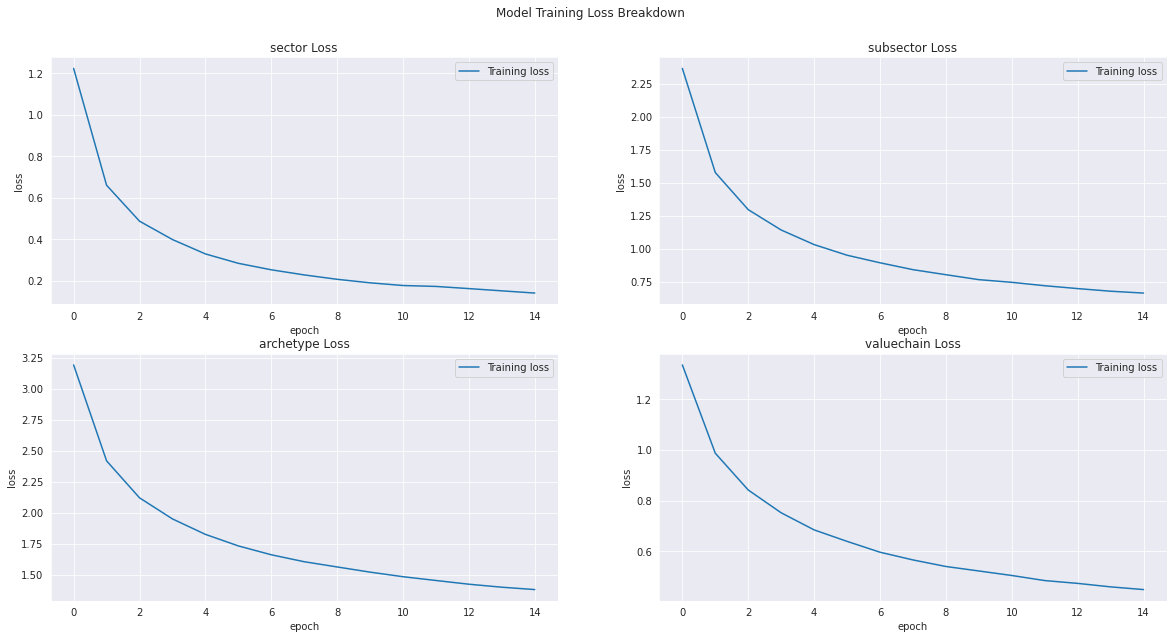

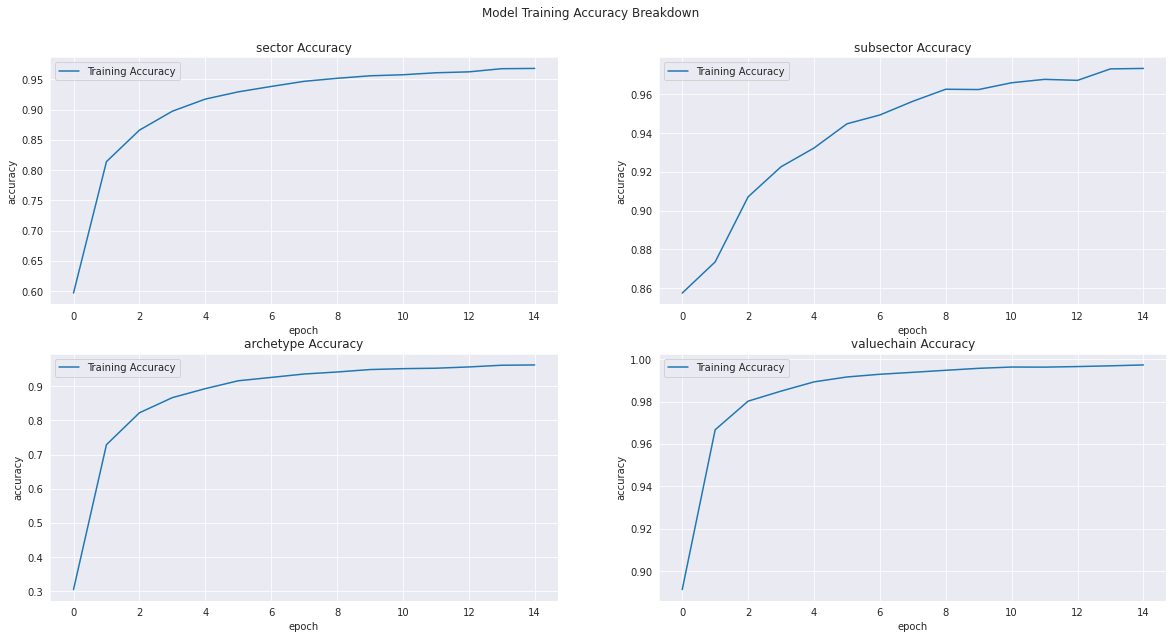

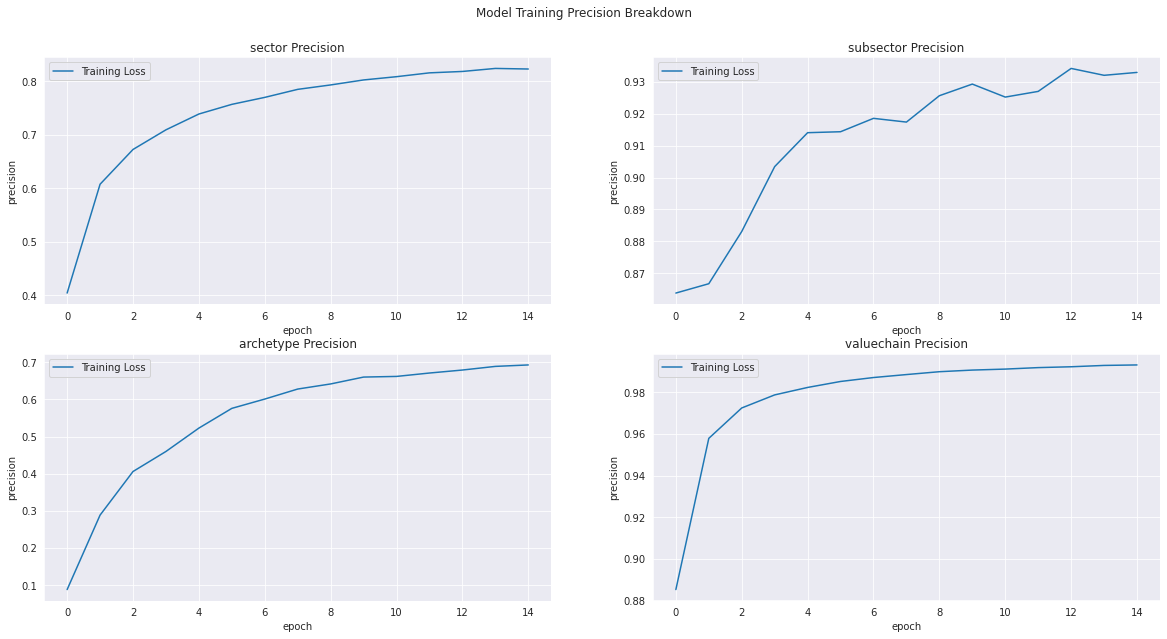

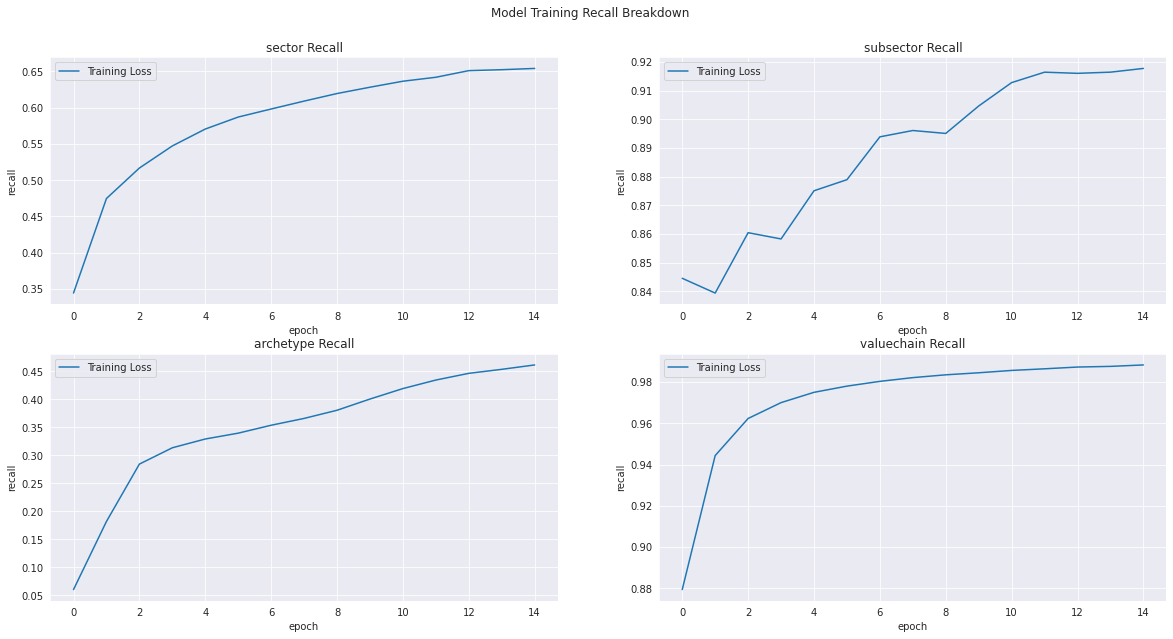

In [47]:
# plot metric graphs for all labels
metric_names = model.metrics_names

fig = plt.figure(1, figsize=(20,10))
plt.suptitle('Model Training Loss Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+1]])
    plt.title(f'{name} Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Training loss'])

fig = plt.figure(2, figsize=(20,10))
plt.suptitle('Model Training Accuracy Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+5]])
    plt.title(f'{name} Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Training Accuracy'])

fig = plt.figure(3, figsize=(20,10))
plt.suptitle('Model Training Precision Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+9]])
    plt.title(f'{name} Precision')
    plt.ylabel('precision')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

fig = plt.figure(4, figsize=(20,10))
plt.suptitle('Model Training Recall Breakdown', y=0.95)

for i, name in enumerate(label_names):
    plt.subplot(2, 2, i+1)
    plt.plot(history.history[metric_names[i+13]])
    plt.title(f'{name} Recall')
    plt.ylabel('recall')
    plt.xlabel('epoch')
    plt.legend(['Training Loss'])

plt.show()

### 5.3 Saving Models

---

This is to facilitiate saving of the model.

In [48]:
# save models to file
model.save('./multilabel_bert_model')

INFO:tensorflow:Assets written to: ./multilabel_bert_model/assets


INFO:tensorflow:Assets written to: ./multilabel_bert_model/assets


In [49]:
!zip -r multilabel_bert_model.zip ./multilabel_bert_model
!rm -rf ./multilabel_bert_model

  adding: multilabel_bert_model/ (stored 0%)
  adding: multilabel_bert_model/keras_metadata.pb (deflated 83%)
  adding: multilabel_bert_model/variables/ (stored 0%)
  adding: multilabel_bert_model/variables/variables.data-00000-of-00001 (deflated 17%)
  adding: multilabel_bert_model/variables/variables.index (deflated 80%)
  adding: multilabel_bert_model/assets/ (stored 0%)
  adding: multilabel_bert_model/saved_model.pb (deflated 92%)


---
---

# 10.References


## Linking GitHub Private Repo with Google Colab
---
1. [How to clone private Github repo from Google Colab using SSH](https://medium.com/@purba0101/how-to-clone-private-github-repo-in-google-colab-using-ssh-77384cfef18f)
2. [Adding a new SSH key to your GitHub account](https://docs.github.com/en/github/authenticating-to-github/adding-a-new-ssh-key-to-your-github-account)


## How to classify text with NLTK
---
1. [Learning to Classify Text](https://www.nltk.org/book/ch06.html)


## Other references
---
1. [Print very long string completely in pandas dataframe](https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
2. [Removing newlines from messy strings in pandas dataframe cells?
](https://stackoverflow.com/questions/44227748/removing-newlines-from-messy-strings-in-pandas-dataframe-cells)
3. [Tokenizing using Pandas and spaCy](https://stackoverflow.com/questions/46981137/tokenizing-using-pandas-and-spacy)
4. [Intro to NLP with spaCy](https://nicschrading.com/project/Intro-to-NLP-with-spaCy/)
5. [A short introduction to NLP in Python with spaCy](https://towardsdatascience.com/a-short-introduction-to-nlp-in-python-with-spacy-d0aa819af3ad)
6. [Punctuation, stopwords and lemmatization with spacy](https://stackoverflow.com/questions/57747613/punctuation-stopwords-and-lemmatization-with-spacy)

